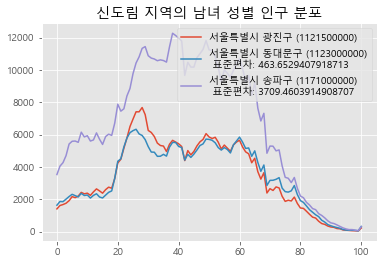

In [4]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt

df = pd.read_csv("D:\\구글드라이브\\2021\\1학기\\오픈소스sw입문\\과제\\population.csv", delimiter=',', encoding = 'cp949', header = 0, index_col = 0)
df = df.iloc[1:,2:] #1행(서울시 전체인구), 1,2열(계) 제외

for i in df.columns: #int형으로 값 변환
    for j in df.index:
            num = df[i][j].replace(",","")
            df[i][j] = int(num)

gwangjin = "서울특별시 광진구 (1121500000)"
df['standard deviation'] = np.mean((df-df.loc[gwangjin])**2, axis=1)
df1 = df.drop(index = gwangjin, axis = 0)
max = df1['standard deviation'].idxmax(axis=0)
min = df1['standard deviation'].idxmin(axis=0)

age = np.arange(101)
plt.style.use('ggplot')
plt.rc('font', family='Malgun Gothic')
plt.title('신도림 지역의 남녀 성별 인구 분포')
plt.plot(age, df.iloc[:,:-1].loc[gwangjin], label=gwangjin)
plt.plot(age, df.iloc[:,:-1].loc[min], label="{0}\n 표준편차: {1}".format(min, m.sqrt(df['standard deviation'][min])))
plt.plot(age, df.iloc[:,:-1].loc[max], label="{0}\n 표준편차: {1}".format(max, m.sqrt(df['standard deviation'][max])))
plt.legend()
plt.show()